In [1]:
#Importing data

import requests
from pandas.io.json import json_normalize
import pandas as pd

url = "https://api-data.public-prod.qare.tech/test_data_science/"
df = pd.read_json(url)
df

,consultation_date,physician_id,patient_id,speciality,cim10
0,2022-04-07T09:20:00,122,0,general-practician,"Grippe, à virus grippal saisonnier identifié"
1,2021-10-01T12:00:00,56,1,general-practician,Sinusite aiguë
2,2022-05-04T20:40:00,89,2,general-practician,Rhinopharyngite aiguë [rhume banal]
3,2022-07-22T21:30:00,129,3,general-practician,Autres cystites
4,2021-01-06T07:10:00,31,4,general-practician,"Grippe, virus non identifié"
...,...,...,...,...,...
4995,2021-12-11T06:00:00,56,4688,general-practician,COVID-19
4996,2022-08-16T20:50:00,150,4689,general-practician,Fatigue [asthénie]
4997,2022-05-30T20:20:00,89,4690,general-practician,Varicelle
4998,2022-01-25T10:00:00,101,4691,general-practician,Gastro-entérite et colite toxiques


In [2]:
df.columns

Index(['consultation_date', 'physician_id', 'patient_id', 'speciality',
       'cim10'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   consultation_date  5000 non-null   object
 1   physician_id       5000 non-null   int64 
 2   patient_id         5000 non-null   int64 
 3   speciality         5000 non-null   object
 4   cim10              5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


The data set gives information of the consultations in a hospital. In total there are 5000 records of the consultations.

Each record of the consultation has assigned an id for the doctor, an id for the patient and the illness they suffer from. All the records have the same speciality: "general-practician".

There are no null values. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

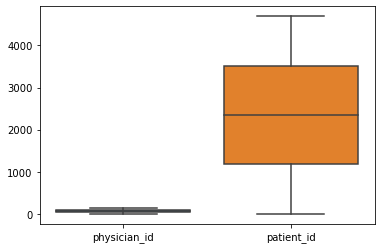

In [5]:
sns.boxplot(data=df)

Although the data set contains numerical data, the boxplot doesnt show any insight about the data.

The set of data does not give any insights from plots.

In [6]:
df.describe()

,physician_id,patient_id
count,5000.000000,5000.00000
mean,78.413200,2345.29340
std,37.901195,1350.22648
min,0.000000,0.00000
25%,56.000000,1182.75000
50%,80.000000,2342.50000
75%,104.000000,3508.25000
max,152.000000,4692.00000


In [7]:
df['cim10'].value_counts()

Gastro-entérite et colite toxiques                                          415
Rhinopharyngite aiguë [rhume banal]                                         334
COVID-19                                                                    322
Autres cystites                                                             238
Cystite aiguë                                                               200
                                                                           ... 
Hydronéphrose avec obstruction de la jonction pyélo-urétérale                 1
Maladies de la cavité buccale, des glandes salivaires et des maxillaires      1
Effets indésirables des antibiotiques systémiques                             1
Mastite (non purulente) associée à l'accouchement                             1
Palpitations                                                                  1
Name: cim10, Length: 533, dtype: int64

Most of the patiens suffer from Gastro-entérite et colite toxiques

In [8]:
df['physician_id'].value_counts()

56     926
122    315
89     244
90     240
97     218
      ... 
11       1
125      1
18       1
47       1
96       1
Name: physician_id, Length: 153, dtype: int64

The physician with id 55 had the most consultations - 931.

In [9]:
df['patient_id'].value_counts()

663     4
3364    4
1634    4
1197    3
395     3
       ..
1606    1
1607    1
1608    1
1609    1
4692    1
Name: patient_id, Length: 4693, dtype: int64

The most consultations a patient has had is 4

In [10]:
df['year'] = pd.DatetimeIndex(df['consultation_date']).year
df['year'].value_counts()

2022    3272
2021    1728
Name: year, dtype: int64

The data set shows information from 2022 and 2021. Most of the data is from 2022.

In [11]:
df['month'] = pd.DatetimeIndex(df['consultation_date']).month
df['month'].value_counts()

8     567
9     545
3     519
6     487
7     471
2     439
4     409
1     397
5     340
12    303
11    293
10    230
Name: month, dtype: int64

Most of the consultations were held in August.

In [12]:
df['day'] = pd.DatetimeIndex(df['consultation_date']).day
df['day'].value_counts()

7     204
4     187
2     186
16    184
10    178
29    176
9     175
8     174
27    174
28    173
12    171
20    171
30    168
11    165
5     165
14    165
19    162
15    161
3     157
21    157
24    157
13    156
23    154
6     154
1     152
25    150
17    142
18    140
22    139
26    130
31     73
Name: day, dtype: int64

In [13]:
df['day_week'] = pd.DatetimeIndex(df['consultation_date']).day_name()
df['day_week'].value_counts()

Monday       981
Tuesday      830
Thursday     740
Friday       736
Wednesday    716
Saturday     581
Sunday       416
Name: day_week, dtype: int64

Monday was the crowdest day for consultations